# Imports

In [184]:
#For importing data and parsing data
from operator import itemgetter
import pprint


#Converting parsed data into raw parsed data output to csv
import csv
from itertools import islice, izip


#For analyzing raw parsed data
import collections, re
from collections import OrderedDict

    #had to uninstall python-dateutil and use old version dateutil 2.2 to avoid error
    #sudo pip uninstall python-dateutil
    #sudo pip install python-dateutil==2.2
import matplotlib.pyplot as plt
import numpy as np 
import matplotlib.gridspec as gridspec
import seaborn as sns

#had to install this using pip on local computer
from natsort import natsorted, natsort_key

#Library to pull query genome chromosome information from CoGe API
import requests


# Methods and Global Variables

In [185]:
#For importing data and parsing. SynMap_import used to build main d{} data structure. GFF_target_
synmap_import_file = '/Users/bjoyce3/Desktop/SynMapFractBiasAnalysis/DataInput/Sorghum-Maize/Oryza_Zea_16888_8082.txt'
gff_target_import_file = '/Users/bjoyce3/Desktop/SynMapFractBiasAnalysis/DataInput/Sorghum-Maize/Oryza_sativa_japonica_Rice.gid16888.gff'

#gff_query_import_file = ('')

d = {}  # initialize dictionary to contain the array of syntenic genome1_chrs, genome1_genes, genome2_chrs, and genome2_genes


#Determines the Genus species of target chromosome
genus_species = ''
with open(gff_target_import_file) as gff_file:
    for line in gff_file:
        if line[0:15] == '##Organism name':
            genus_species = line[17:-1]
            species_name = genus_species.replace(' ','_')
            species_name_filter = species_name.translate(None, '(){}[]')


#Parsed data and raw output to csv
gff_genes_target = {}  # initializes dictionary for organization of genes on chromosomes within target genome according to start bp

#Output
gff_sort_output_file = ("/Users/bjoyce3/Desktop/SynMapFractBiasAnalysis/DataOutput/brassica/ALL_GFF_sorted_"+str(species_name_filter)+ ".txt")
synmap_dictionary_output_file = ("/Users/bjoyce3/Desktop/SynMapFractBiasAnalysis/DataOutput/brassica/ALL_dictionary_syntenic genes_" +str(species_name_filter)+ ".txt")
fract_bias_raw_output_file = ("/Users/bjoyce3/Desktop/SynMapFractBiasAnalysis/DataOutput/brassica/ALL_fractbias_" +str(species_name_filter)+ "output.csv")
retention_calc_output_file = ("/Users/bjoyce3/Desktop/SynMapFractBiasAnalysis/DataOutput/brassica/Window_output_"+str(species_name_filter+".csv"))

#Analysis of parsed data

target_lst = []
query_lst = []

##METHODS

#Identify each chromosome present in genomes from dictionaries made previously
def chr_id(input_dict):
    for item in input_dict:
        if not item in target_lst:
            target_lst.append(item)
        for gene in input_dict[item]:
            for chr in input_dict[item][gene]:
                if not chr in query_lst:
                    query_lst.append(chr)

                
                    
#http://stackoverflow.com/questions/6822725/rolling-or-sliding-window-iterator-in-python
def window(seq, n):
    "Returns a sliding window (of width n) over data from the iterable"
    "   s -> (s0,s1,...s[n-1]), (s1,s2,...,sn), ...                   "
    it = iter(seq)
    result = tuple(islice(it, n))
    if len(result) == n:
        yield result
    for elem in it:
        result = result[1:] + (elem,)
        yield result
        

##Data Paths

### Pina & Rice

In [186]:
#synmap_import_file = '/Users/bjoyce3/Desktop/SynMapFractBiasAnalysis/DataInput/Pina-Rice/pina_gdcoords_overlap40.txt'
#gff_target_import_file = '/Users/bjoyce3/Desktop/SynMapFractBiasAnalysis/DataInput/Pina-Rice/Ananas_comosus_pineapple_v6.gff'


### Sorghum & Maize

In [187]:
#synmap_import_file = '/Users/bjoyce3/Desktop/SynMapFractBiasAnalysis/DataInput/Sorghum-Maize/SorghumMaize_gcoords_merge60_syntenicdepth40.txt'
#gff_target_import_file = '/Users/bjoyce3/Desktop/SynMapFractBiasAnalysis/DataInput/Sorghum-Maize/Sorghum_bicolor_6807_prodrun.gff'


### Brassicas

In [188]:
##A. thaliana - Brassica rapa (1:3)
#synmap_import_file = '/Users/bjoyce3/Desktop/SynMapFractBiasAnalysis/DataInput/Brassicas/Athaliana_Brapa_gcoords_1-3.txt'
#gff_target_import_file = '/Users/bjoyce3/Desktop/SynMapFractBiasAnalysis/DataInput/Brassicas/Arabidopsis_thaliana.gid25869.gff'

##A. thaliana - Brassica napus (1:6)
#synmap_import_file = '/Users/bjoyce3/Desktop/SynMapFractBiasAnalysis/DataInput/Brassicas/Athaliana_Bnapus_1-6.txt'
#gff_target_import_file = '/Users/bjoyce3/Desktop/SynMapFractBiasAnalysis/DataInput/Brassicas/Arabidopsis_thaliana.gid25869.gff'

##Brassica napus - Brassica rapa (2:1)
#synmap_import_file = '/Users/bjoyce3/Desktop/SynMapFractBiasAnalysis/DataInput/Brassicas/Bnapus_Brapa_gcoords_2-1.txt'
#gff_target_import_file = '/Users/bjoyce3/Desktop/SynMapFractBiasAnalysis/DataInput/Brassicas/Brassica_rapa.gid24668.gff'


##OUTPUT
#gff_sort_output_file = ("/Users/bjoyce3/Desktop/SynMapFractBiasAnalysis/DataOutput/brassica/ALL_GFF_sorted_"+str(species_name_filter)+ ".txt")
#synmap_dictionary_output_file = ("/Users/bjoyce3/Desktop/SynMapFractBiasAnalysis/DataOutput/brassica/ALL_dictionary_syntenic genes_" +str(species_name_filter)+ ".txt")
#fract_bias_raw_output_file = ("/Users/bjoyce3/Desktop/SynMapFractBiasAnalysis/DataOutput/brassica/ALL_fractbias_" +str(species_name_filter)+ "output.csv")
#retention_calc_output_file = ("/Users/bjoyce3/Desktop/SynMapFractBiasAnalysis/DataOutput/brassica/Window_output_"+str(species_name_filter+".csv"))

##Fish

In [189]:
#gar-trout
#synmap_import_file = '/Users/bjoyce3/Desktop/SynMapFractBiasAnalysis/DataInput/fish/gar-trout_syndepth40_maxks1-47.txt'
#gff_target_import_file = '/Users/bjoyce3/Desktop/SynMapFractBiasAnalysis/DataInput/fish/.gff'

#pike-trout
#synmap_import_file = '/Users/bjoyce3/Desktop/SynMapFractBiasAnalysis/DataInput/fish/pike-trout_syndepth40_ksmax1-1.txt'
#gff_target_import_file = '/Users/bjoyce3/Desktop/SynMapFractBiasAnalysis/DataInput/fish/Esox_lucius_pike_25161.gff'

#Output
#gff_sort_output_file = ("/Users/bjoyce3/Desktop/SynMapFractBiasAnalysis/DataOutput/fish/ALL_GFF_sorted_"+str(species_name_filter)+ ".txt")
#synmap_dictionary_output_file = ("/Users/bjoyce3/Desktop/SynMapFractBiasAnalysis/DataOutput/fish/ALL_dictionary_syntenic genes_" +str(species_name_filter)+ ".txt")
#gff_genes_target = {}  # initializes dictionary for organization of genes on chromosomes within genome1 according to start bp
#fract_bias_raw_output_file = ("/Users/bjoyce3/Desktop/SynMapFractBiasAnalysis/DataOutput/fish/ALL_fractbias_" +str(species_name_filter)+ "output.csv")

#Analysis of parsed data
#retention_calc_output_file = ("/Users/bjoyce3/Desktop/SynMapFractBiasAnalysis/DataOutput/fish/Window_output_"+str(species_name_filter+".csv"))


##Poplar

In [190]:
#Theobroma-poplar (1:2)
#synmap_import_file = ('/Users/bjoyce3/Desktop/SynMapFractBiasAnalysis/DataInput/Vitis-poplar/Theobroma-poplar_1-2_gcoords.txt')
#gff_target_import_file = ('/Users/bjoyce3/Desktop/SynMapFractBiasAnalysis/DataInput/Vitis-poplar/Theobroma_cacao_gid10997.gff')
#OUTPUT
#
#

#Vitis-poplar  (1:2)
#synmap_import_file = ('/Users/bjoyce3/Desktop/SynMapFractBiasAnalysis/DataInput/Vitis-poplar/Vitis_poplar_1-2_gcoords.txt')
#gff_target_import_file = ('/Users/bjoyce3/Desktop/SynMapFractBiasAnalysis/DataInput/Vitis-poplar/Vitis_vinifera_grape_gid19990.gff')

#User Settings

In [191]:
#Set target genome and query genome

args_target = "16888" #Oryza
#"25869" #arabidopsis
#'6807' #sorghum 
#'25734'  #pina
#'25161'  #pike
#'25003'  #gar
#'19990' #vitis vinifera
#'10997' #theobroma
#'24668'  #Brassica rapa
#"16888" #Oryza

#Set whether to use all genes or 
args_all_genes = True  #True == use all genes in target genome; False == use only genes with at least one syntenic pair

window_size = 100


#NEW ARGS TO ADD TO GECO
args_query = '8082'  #Zea mays
#'24668'  #Brassica rapa
#'8082'  #Zea mays
#'20192'  #Brassica napus

args_numtargetchr = int(12)
args_numquerychr = int(10)
args_remove_random_unknown = True #True == removes random and unknown chromosome names, False == removes nothing


# Importing Data and Making Data Structures

Reads SynMap and GFF files and parse data into data arrays. 

SynMap data is put into nested dictionary called 'd':
d{target_chr
    {target_gene
        {query_chr
            {query gene}
  }}}

GFF data from the target genome is put into a nested dictionary call 'gff_genes_target':


In [192]:
"""Calls Genome Fetch CoGE API to get query genome and target chromosomes and orders them"""

#retrieves api chromsome lists and length and moves json() object into Python dictionary
query_api = requests.get("https://genomevolution.org/coge/api/v1/genomes/" + str(args_query))
target_api = requests.get("https://genomevolution.org/coge/api/v1/genomes/" + str(args_target))
query_api = query_api.json()
target_api = target_api.json()


#initializes dictionaries to drop api data into
target_api_chrs = []
target_api_chrs_sorted = []
target_api_chrs_sorted_filtered = []
target_api_chrs_sorted_name = []
target_api_chrs_final = []
query_api_chrs = []
query_api_chrs_sorted = []
query_api_chrs_sorted_filtered = []
query_api_chrs_sorted_name = []
query_api_chrs_final = []

#query genome chromosomes parsed, restricted by length largest -> smallest, and sorted according to name
for chr in query_api['chromosomes']:
    if args_remove_random_unknown == True:
        if "Random" in chr['name'] or "random" in chr['name'] or "Unknown" in chr['name'] or "unknown" in chr['name']:
            continue
        else:
            query_api_chrs.append((chr['name'], chr['length']))
    if args_remove_random_unknown == False:
        query_api_chrs.append((chr['name'], chr['length']))
query_api_chrs_sorted = natsorted(query_api_chrs, key=lambda chr: chr[1], reverse=True)
query_api_chrs_sorted_filtered = query_api_chrs_sorted[0:args_numquerychr]
query_api_chrs_sorted_name = natsorted(query_api_chrs_sorted_filtered, key=lambda chr: chr[0])
for chr in query_api_chrs_sorted_name:
    query_api_chrs_final.append(chr[0])

#target genome chromosomes parsed, restricted by length largest ->smallest, and sorted according to name
for chr in target_api['chromosomes']:
    if args_remove_random_unknown == True:
        if "Random" in chr['name'] or "random" in chr['name'] or "Unknown" in chr['name'] or "unknown" in chr['name']:
            continue
        else:
            target_api_chrs.append((chr['name'], chr['length']))
    if args_remove_random_unknown == False:
        target_api_chrs.append((chr['name'], chr['length']))
target_api_chrs_sorted = natsorted(target_api_chrs, key=lambda chr: chr[1], reverse=True)
target_api_chrs_sorted_filtered = target_api_chrs_sorted[0:args_numtargetchr]
target_api_chrs_sorted_name = natsorted(target_api_chrs_sorted_filtered, key=lambda chr: chr[0])
for chr in target_api_chrs_sorted_name:
    target_api_chrs_final.append(chr[0])



In [193]:
"""
Reads SynMap files and parses data into columns in array

"""

d = {}

with open(synmap_import_file, 'r') as f:  # open SynMap file containing syntenic genes
    synmap_rowcount = 0
    cols = []  # list for parsing columns from SynMap data
    decimal_strip_check_target_gene = 0
    for line in f:  # for loop to parse columns
        new_line = line.replace('||', '\t')  #converts || into tabs for universal delimination
        if line[0] != '#' and line[0] != '\n':  #sorts out columns containing syntenic block information/headings
            cols = new_line.split('\t', )  #splits all syntenic gene pair lines into parsed columns in a list
            synmap_rowcount += 1
            global target_chr
            global target_gene
            global query_chr
            global query_gene
            if synmap_rowcount == 1:            
                #clean ID subgenome A from the column on left of data
                ida = cols[0]
                ida = ida[1:cols[0].index('_')]
#Determines which are target and query genes                
            if args_target == ida:
                target_chr = cols[1]
                if any(target_chr in s for s in target_api_chrs_final):
                    target_gene = str(cols[7]) #.rsplit(".", 1)[0]  #puts all genome1_genes with synteny into a list
                    #decimal_strip_check_target_gene = target_gene.find('.')
                    #if not decimal_strip_check_target_gene == (-1):
                        #target_gene = target_gene[:(decimal_strip_check_target_gene)]
                else:
                    continue
                query_chr = str(cols[13])  #puts all genome2_chrs with synteny to genes in genome1 into a list
                if any(query_chr in s for s in query_api_chrs_final):
                    query_gene = str(cols[19])  #.rsplit(".", 1)[0]  #puts all genome2_genes with synteny to genes in a genome1 into a list
                else:
                    continue
            else:
                target_chr = cols[13]
                if any(target_chr in s for s in target_api_chrs_final):
                    target_gene = str(cols[19])
                    #decimal_strip_check_target_gene = target_gene.find('.')
                    #if not decimal_strip_check_target_gene == (-1):
                    #    target_gene = target_gene[:(decimal_strip_check_target_gene)]
                    #puts all genome1_genes with synteny into a list
                else:
                    continue
                query_chr = str(cols[1])  #puts all genome2_chrs with synteny to genes in genome1 into a list
                if any(query_chr in s for s in query_api_chrs_final):
                    query_gene = cols[7]  #.rsplit(".", 1)[0]  #puts all genome2_genes with synteny to genes in a genome1 into a list
                else:
                    continue
            if not target_chr in d:
                d[target_chr] = {}  #initializes the nested dictionary-primary level at genome1_chromosome
            if not target_gene in d[target_chr]:
                d[target_chr][target_gene] = {}  #initializes first nesting in dictionary-second level at genome1_genes
            if not query_chr in d[target_chr][target_gene]:
                d[target_chr][target_gene][query_chr] = query_gene  #initializes nested dictionary-third level at genome2_chr


#check lengths of synmap data structure
"""for tchr in d:
    #print "Target Chromosome"
    print tchr
    #print len(d[tchr])
    for tgene in d[tchr]:
        #print "length of target gene"
        #print len(d[tchr][tgene])
        for qchr in d[tchr][tgene]:
            #print "length of qchr"
            #print len(d[tchr][tgene][qchr])
            print "     " + str(qchr)
            #print d[tchr][tgene][qchr]"""


'for tchr in d:\n    #print "Target Chromosome"\n    print tchr\n    #print len(d[tchr])\n    for tgene in d[tchr]:\n        #print "length of target gene"\n        #print len(d[tchr][tgene])\n        for qchr in d[tchr][tgene]:\n            #print "length of qchr"\n            #print len(d[tchr][tgene][qchr])\n            print "     " + str(qchr)\n            #print d[tchr][tgene][qchr]'

In [194]:
"Create hashable data structure to look up gene/CDS name. CDS_name_dict: CDS_key_name: 1 if TRUE"
CDS_name_dict = {}  #initializes the CDS name dictionary for looking up if CDS already have been identified
gff_genes_target = {}

'''Reads GFF from target genome and puts into data strcuture gff_genes'''
with open(gff_target_import_file, 'r') as g:  # opens gff file
    gffcols = []  #list of parsed gff columns
    chr = []  #initialize list of chromosomes present in genome1 gff file
    for line in g:
        new_line = line.replace(';', '\t')  #makes subdelims universal in gff file from CoGe
        new_line = new_line.replace('Name=', '')  #strips Name= off gene_name in gff file from CoGe
        if new_line[0] != '#' and new_line[0] != '\n':  #selects only lines with CDS information
            gffcols = new_line.split('\t', )  #parses all column
            if (any(gffcols[0] in s for s in target_api_chrs_final) and (gffcols[2] == 'CDS')):  #selects only 'CDS' lines for consideration
                chr = gffcols[0]  #adds genome1_chrs to list
                if not chr in gff_genes_target:
                    gff_genes_target[chr] = []  #initializes chr list in dictionary if chr does not exist yet
                gene_name = str(gffcols[-1])   #[9]).rsplit(".", 1)[0]
                #gene_name = gene_name.rsplit(".", 1)[0]
                gene_name = gene_name.rstrip("\n")
                gene_name1 = gene_name[9:] #adds targetgenome_genes to list and removes the "ID=" added by CoGe
                start = int(gffcols[3])  #adds targetgenome_gene start bp to list for ordering as integer
                stop = int(gffcols[4])  #adds targetgenome_gene stop bp to list ?for ordering? as integer
                try:
                    CDS_name_dict[str(gene_name1)] == 1
                    continue
                except KeyError:
                    gff_genes_target[chr].append(dict(gene_name=gene_name1, start=start, stop=stop))
                    CDS_name_dict[str(gene_name1)] = 1


#Checking GFF and ordered chromosome data structures
"""print "Length of CDS_NAME_DICT:"
print len(CDS_name_dict)                

sm = 0
for tchr in gff_genes_target:
    #if tchr == "A01":
    #    print gff_genes_target[tchr]
    print "Length of gff_genes_target_tchr" + str(tchr)
    print len(gff_genes_target[tchr])
    sm = sm + len(gff_genes_target[tchr])
print sm"""



'print "Length of CDS_NAME_DICT:"\nprint len(CDS_name_dict)                \n\nsm = 0\nfor tchr in gff_genes_target:\n    #if tchr == "A01":\n    #    print gff_genes_target[tchr]\n    print "Length of gff_genes_target_tchr" + str(tchr)\n    print len(gff_genes_target[tchr])\n    sm = sm + len(gff_genes_target[tchr])\nprint sm'

In [195]:
'''Sorts GFF genes within target chromosomes by start position'''
gff_sort_all = {}
gff_sort_all = natsorted(gff_genes_target)


for chr in gff_genes_target:
    gff_genes_sorted = sorted(gff_genes_target[chr], key=itemgetter('start'))  #Creates dictionary for searching genes against::CONSIDER sorting on midpoint of genes rather than
    gff_genes_target[chr] = gff_genes_sorted        
    
#CONSIDER WRITING A CHECK PROGRAM TO RETURN TRUE IF ALL VALUES ARE SORTED OR FALSE

In [196]:
'''Writes out SynMap dictionary and sorted GFF gene list to document for parsed output'''

with open(str(gff_sort_output_file), 'w') as h:
	h.write(str(gff_genes_target))
with open(synmap_dictionary_output_file, 'w+') as i:
    i.write(str(d))

##Determine Gene Sorting Preference: all genes or at least one syntenic gene
If args_all_genes == True
If args_all_genes == False: SynMap data is filtered to remove any target genome genes that do not match to any genes present on the query genome chromosomes. Specifically: any {target_chr: target_gene:} that is 'False' for all query chromosomes

In [197]:
'''Determine syntenic gene pairs present and output Raw Data CSV file from parsed data'''

#Deprecated method call to determine genome chrs
chr_id(d)
target_lst = natsorted(target_lst)
query_lst = natsorted(query_lst)

print query_api_chrs_final

windanalysis_input_dict = {}


with open(str(fract_bias_raw_output_file), 'w') as csvfile:
    headers = ['Target Chromosome', 'Target Gene Name', 'Gene Order on Target Chromosome']
    headers.extend(query_api_chrs_final)
    headers.extend(query_api_chrs_final)
    writer = csv.writer(csvfile, dialect='excel', delimiter=',', lineterminator='\n')
    writer.writerow(headers)

    if args_all_genes == True:
        for tchr in gff_genes_target:
            col0 = chr #writes Pineapple chr number
            count = 0
            for diction in gff_genes_target[tchr]:
                gene = diction['gene_name']
                col1 = gene #writes gene name
                count += 1
                col2 = count #writes pineapple gene number on pineapple chr
                #Find the query chr genes and output to columns: first gff info (col0-3), query chr (col 4-n), query chr-gene (col n+1-m)
                syntenic_query_gene_presence_data = []
                syntenic_query_gene_name = []
                for qchr in query_api_chrs_final:
                    if not tchr in windanalysis_input_dict:
                        windanalysis_input_dict[tchr] = {}  #initializes the nested dictionary-primary level at genome1_chromosome
                    if not qchr in windanalysis_input_dict[tchr]:
                        windanalysis_input_dict[tchr][qchr] = []  #initializes first nesting in dictionary-second level at genome1_genes

                    try:
                        syn_gene = d[tchr][gene][qchr]
                        syntenic_query_gene_presence_data.append(True)
                        syntenic_query_gene_name.append(syn_gene)
                        windanalysis_input_dict[tchr][qchr].append(True)
                    except KeyError:
                        syntenic_query_gene_presence_data.append(False)
                        syntenic_query_gene_name.append("")
                        windanalysis_input_dict[tchr][qchr].append(False)
                rows = [tchr, col1, col2]
                rows.extend(syntenic_query_gene_presence_data)
                rows.extend(syntenic_query_gene_name)
                writer.writerow(rows)                                           
                    
    elif args_all_genes == False:
        for tchr in gff_genes_target:
            col0 = chr #writes target chr number
            count = 0
            for diction in gff_genes_target[tchr]:
                gene = diction['gene_name']
                col1 = gene #writes target gene name
                count += 1
                col2 = count #writes target gene number on target chr
                #Find the query chr genes and output to columns: first gff info (col0-3), query chr (col 4-n), query chr-gene (col n+1-m)
                syntenic_query_gene_presence_data = []
                syntenic_query_gene_name = []
                for qchr in query_api_chrs_final:
                    if not tchr in windanalysis_input_dict:
                        windanalysis_input_dict[tchr] = {}  #initializes the nested dictionary-primary level at genome1_chromosome
                    if not qchr in windanalysis_input_dict[tchr]:
                        windanalysis_input_dict[tchr][qchr] = []  #initializes first nesting in dictionary-second level at genome1_genes

                    try:
                        syn_gene = d[tchr][gene][qchr]
                        syntenic_query_gene_presence_data.append(True)
                    except KeyError:
                        syntenic_query_gene_presence_data.append(False)
                                
                if sum(syntenic_query_gene_presence_data) >= 1:
                    for qchr in query_api_chrs_final:
                        try:
                            syn_gene = d[tchr][gene][qchr]
                            syntenic_query_gene_name.append(syn_gene)
                            windanalysis_input_dict[tchr][qchr].append(True)
                        except KeyError:
                            syntenic_query_gene_name.append("")
                            windanalysis_input_dict[tchr][qchr].append(False)                    
                    rows = [tchr, col1, col2]
                    rows.extend(syntenic_query_gene_presence_data)
                    rows.extend(syntenic_query_gene_name)
                    writer.writerow(rows) 

                elif sum(syntenic_query_gene_presence_data) < 1:               
                    continue
                else:
                    print 'Target gene not classified'
                    continue

    else:
        print "Genes to be used (all genes or at least one syntenic gene) are not defined"

        
##FOR INVESTIGATING COMPARISON DATA STRUCTURE
  
"""print windanalysis_input_dict

print "Number of windanalysis_input chromosomes = "+str(len(windanalysis_input_dict))        

for tchr in windanalysis_input_dict:
    print "Name of windanalysis_input target chromosome = " + str(tchr)
    print len(windanalysis_input_dict[tchr])
    for qchr in windanalysis_input_dict[tchr]:
        print qchr
        print len(windanalysis_input_dict[tchr][qchr])"""

        

[u'1', u'2', u'3', u'4', u'5', u'6', u'7', u'8', u'9', u'10']


'print windanalysis_input_dict\n\nprint "Number of windanalysis_input chromosomes = "+str(len(windanalysis_input_dict))        \n\nfor tchr in windanalysis_input_dict:\n    print "Name of windanalysis_input target chromosome = " + str(tchr)\n    print len(windanalysis_input_dict[tchr])\n    for qchr in windanalysis_input_dict[tchr]:\n        print qchr\n        print len(windanalysis_input_dict[tchr][qchr])'

# Analysis of Data Structures

Looks through each chromosome in target genome (tchr), and goes through each gene gene on that target chromosome (determined by the GFF uploaded above according to bp position on that target chromosome) to compare to the query genome (query chromsomes). If a target gene


In [198]:
# '''Analysis: for each chromosome in genome1 read the genes on a chromosome and compare to subgenome array of syntenic genes'''

data_output0 = []
data_output1 = []
data_output2 = []
data_output3 = []
output_dict = {}
alphanum_output_dict = {}
numsorted_output_dict = {}

#Process windows 100genes/sliding window and 
#output to nested dictionary data structure output_dict{target chr:}{query chr}{window count:retention%}
for tchr in windanalysis_input_dict:
    tchr_counter = tchr
    for qchr in windanalysis_input_dict[tchr]:
        counter = 0
        qchr_counter = qchr
        if not tchr in output_dict:
            output_dict[tchr] = {}  #initializes the nested dictionary-primary level at genome1_chromosome
        if not qchr in output_dict[tchr]:
            output_dict[tchr][qchr] = {}  #initializes first nesting in dictionary-second level at genome1_genes
        try:
            if (int(len(windanalysis_input_dict[tchr][qchr]))) >= window_size:
                for each in window(windanalysis_input_dict[tchr][qchr], window_size):
                    counter += 1
                    data_output2 = float(sum(each)) / float(window_size)
                    output_dict[tchr][qchr][counter] = round(data_output2*100.) 
                    
        except KeyError:
            continue

#Sort output_dict for tchr alphanumberic at top level
#if tchr are only integers (not alpha&numeric) the except statement will sort just integers

'''try:   
    alphanumbsort = lambda k,v: [k, int(v)]
    output_dict = collections.OrderedDict(sorted(output_dict.items(), key=lambda t: alphanumbsort(*re.match(r'([a-zA-Z]+)(\d+)',t[0]).groups())))
    print "alphanum"
except ValueError:
    print "value_error"
except AttributeError:
    #for tchr in output_dict:
        #for qchr in output_dict[tchr]:
    #numb_sort = lambda k,v: [int(k), int(v)]
    numsorted_output_dict = sorted(output_dict.items(), key=lambda t: int(t[0])) #t: numb_sort(, t[0].groups())))            
    #numsorted_output_dict = sorted(numsorted_output_dict.keys(), key=lambda k: numsorted_output_dict[k])
    output_dict = numsorted_output_dict
    print "numsorted"

#print output_dict'''

'try:   \n    alphanumbsort = lambda k,v: [k, int(v)]\n    output_dict = collections.OrderedDict(sorted(output_dict.items(), key=lambda t: alphanumbsort(*re.match(r\'([a-zA-Z]+)(\\d+)\',t[0]).groups())))\n    print "alphanum"\nexcept ValueError:\n    print "value_error"\nexcept AttributeError:\n    #for tchr in output_dict:\n        #for qchr in output_dict[tchr]:\n    #numb_sort = lambda k,v: [int(k), int(v)]\n    numsorted_output_dict = sorted(output_dict.items(), key=lambda t: int(t[0])) #t: numb_sort(, t[0].groups())))            \n    #numsorted_output_dict = sorted(numsorted_output_dict.keys(), key=lambda k: numsorted_output_dict[k])\n    output_dict = numsorted_output_dict\n    print "numsorted"\n\n#print output_dict'

##Output processed data to csv

In [199]:
'''with open(retention_calc_output_file, 'wb') as csvf:
    headers = ['Target Chromosome', 'Query Chromosome' 'Window Iteration (x-axis)']
    headers.extend(query_lst)
    writer = csv.writer(csvf, dialect='excel', delimiter=',', lineterminator='\n')
    writer.writerow(headers)
    for tchr in windanalysis_input_dict:
        for qchr in windanalysis_input_dict[tchr]:            
            #Prints into two columns
            writer.writerows(izip( output_dict[tchr][qchr]))'''

##Statistics Output NEEDS FIXING

#for tchr in output_dict:
    #for qchr in output_dict[tchr]:
        #print np.mean(output_dict[tchr][qchr])
        #print np.median_grouped(output_dict[tchr][qchr])


"with open(retention_calc_output_file, 'wb') as csvf:\n    headers = ['Target Chromosome', 'Query Chromosome' 'Window Iteration (x-axis)']\n    headers.extend(query_lst)\n    writer = csv.writer(csvf, dialect='excel', delimiter=',', lineterminator='\n')\n    writer.writerow(headers)\n    for tchr in windanalysis_input_dict:\n        for qchr in windanalysis_input_dict[tchr]:            \n            #Prints into two columns\n            writer.writerows(izip( output_dict[tchr][qchr]))"

##Check data structures

In [200]:
#Check size of SynMap nested dictionary d data structure
#for tchr in d:
#    print "Target Chromosome"
#    print tchr
#    print len(d[tchr])
#    for tgene in d[tchr]:
#        print len(d[tchr][tgene])
#print d

#Check size of sorted GFF data structure 
#print gff_genes_target
#print len(gff_genes_target)
#print windanalysis_input_dict
#print output_dict

#print (max(output_dict.itervalues()))
countofchrgraph = 0
listofchrgraph = []

for tchr in output_dict:
    sumofchr = 0
    for qchr in output_dict[tchr]:
        try:
            (max(output_dict[tchr][qchr].itervalues()))
            sumofchr = sumofchr + (max(output_dict[tchr][qchr].itervalues()))
        except ValueError:
            continue
    if sumofchr > 5:
        countofchrgraph += 1
        listofchrgraph.append(str(tchr))

listofchrgraph = natsorted(listofchrgraph)

print listofchrgraph
print countofchrgraph
type(countofchrgraph)

print len(target_lst)
print len(output_dict)
print len(query_api_chrs_final)

['Chr1', 'Chr2', 'Chr3', 'Chr4', 'Chr5', 'Chr6', 'Chr7', 'Chr8', 'Chr9', 'Chr10', 'Chr11', 'Chr12']
12
12
12
10


Plotting subplot: 0
Plotting subplot: 1
Plotting subplot: 2
Plotting subplot: 3
Plotting subplot: 4
Plotting subplot: 5
Plotting subplot: 6
Plotting subplot: 7
Plotting subplot: 8
Plotting subplot: 9
Plotting subplot: 10
Plotting subplot: 11


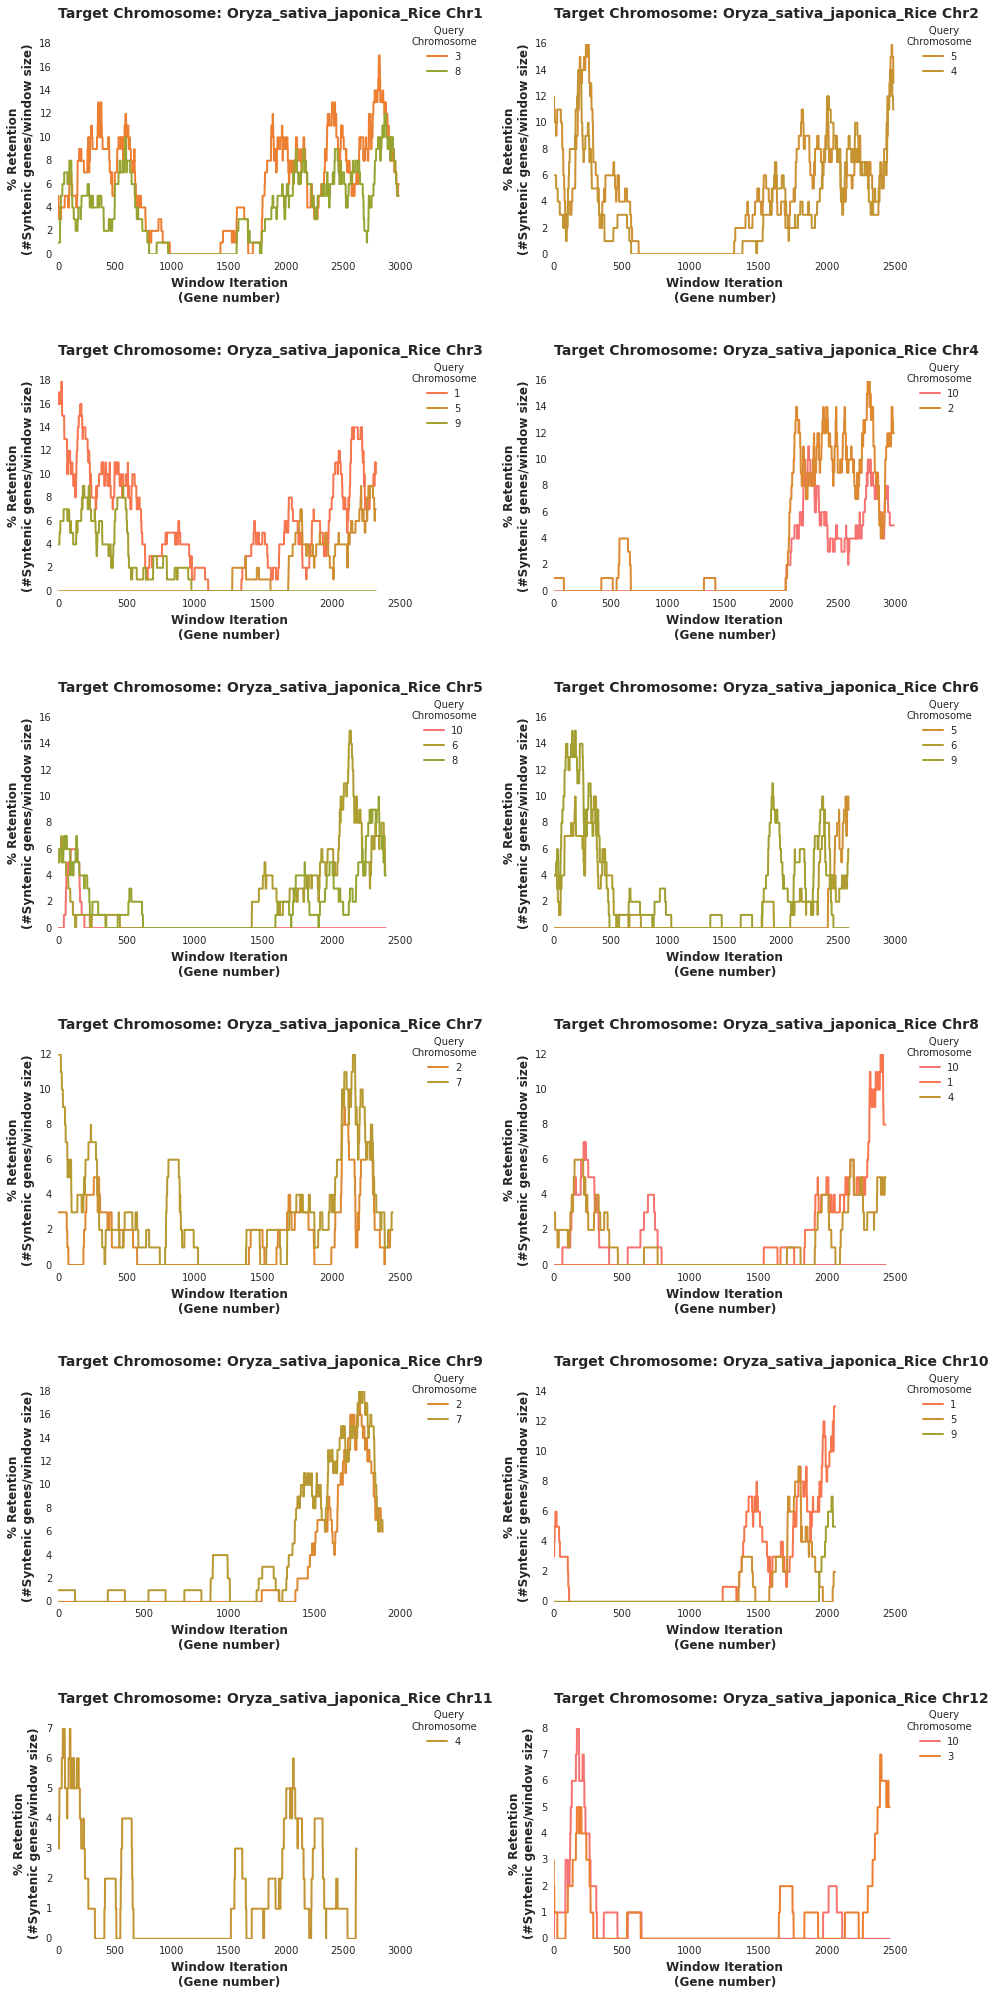

In [208]:
%matplotlib inline


#define figure size, column layout, grid layout
figsize = (15, (len(query_api_chrs_final))+30)
cols = 2
gs = gridspec.GridSpec(len(output_dict) // cols + 1, cols)


# These are the "Tableau 20" colors as RGB  
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)] 

# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts  
for i in range(len(tableau20)):  
    r, g, b = tableau20[i]  
    tableau20[i] = (r / 255., g / 255., b / 255.)

#Alternate color palettes Seaborn/Brewer

current_palette = sns.color_palette("husl", 40) #("Set2", 30)
#tableau20   

fig = plt.figure(figsize=figsize, frameon=False)
subplt_count = -1
ax = []
for tchr in listofchrgraph:
    subplt_count += 1
    print "Plotting subplot: "+str(subplt_count)
    count = 0 
    row = (subplt_count // cols)
    col = subplt_count % cols
    ax.append(fig.add_subplot(gs[row, col]))   
    for qchr in output_dict[tchr]:
        count += 1
        try:
            if (max(output_dict[tchr][qchr].itervalues()))>5:
                x = output_dict[tchr][qchr].keys()
                y = output_dict[tchr][qchr].values()
                #Sets up plotting conditions
                ax[-1].spines["top"].set_visible(False)
                ax[-1].spines["right"].set_visible(False)
                ax[-1].spines["left"].set_visible(True)
                ax[-1].spines["bottom"].set_visible(True)
                ax[-1].patch.set_visible(False)
                ax[-1].get_xaxis().tick_bottom()
                ax[-1].get_yaxis().tick_left()
                ax[-1].plot(x, y, color=current_palette[count], lw=2, label=str(qchr))
                ax[-1].set_title(label='Target Chromosome: '+species_name_filter+" "+ tchr, fontweight='bold', fontsize=14, y=1.1, loc='left')
                ax[-1].set_xlabel('Window Iteration\n(Gene number)', fontsize=12, fontweight='bold')
                ax[-1].set_ylabel('% Retention\n(#Syntenic genes/window size)', fontsize=12, fontweight='bold')
                ax[-1].legend(bbox_to_anchor=(1.25, 1.13), loc=1, frameon=False, title="       Query\nChromosome", fontsize=10)
            else:
                continue    
        except ValueError:
            continue

#fig.tight_layout(pad=2, w_pad = 6)
fig.subplots_adjust(wspace=0.45, hspace=0.6)
plt.savefig("/Users/bjoyce3/Desktop/SynMapFractBiasAnalysis/fractbias_figure"+str(species_name_filter)+".png", transparent=False)

In [202]:
"""Export Processed Fractional Bias Data to JSON File
import json
import csv

with open("myFile.json", "w") as f:
    json.dump(output_dict,f)
    
x = json.loads(output_dict)




f = csv.writer(open("test.csv", "wb+"))

# Write CSV Header, If you dont need that, remove this line
#f.writerow(["pk", "model", "codename", "name", "content_type"])

for x in x:
    f.writerow([x["tchr"], 
                x["tchr"]["qchr"]])
"""

'Export Processed Fractional Bias Data to JSON File\nimport json\nimport csv\n\nwith open("myFile.json", "w") as f:\n    json.dump(output_dict,f)\n    \nx = json.loads(output_dict)\n\n\n\n\nf = csv.writer(open("test.csv", "wb+"))\n\n# Write CSV Header, If you dont need that, remove this line\n#f.writerow(["pk", "model", "codename", "name", "content_type"])\n\nfor x in x:\n    f.writerow([x["tchr"], \n                x["tchr"]["qchr"]])\n'